## US Election 2020 Tweets Analysis

The ["US Election 2020 Tweets" dataset](https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data) provides an extensive collection of tweets from around the world that include hashtags related to the 2020 U.S. presidential candidates, Biden and Trump.

### Objectives
For this analysis, we will focus exclusively on single tweets from each unique Twitter user based in the United States, and in English, to perform text analysis with three main goals:

- **Tweets distribution Analysis**: Clear the dataset and prepare it for a general analysis. Describe how tweets are distributed between the two U.S. candidates in all US and across federal states;
- **Global Sentiment Analysis**: Clear the dataset and prepare it for a Sentiment Text Analysis. Assess the sentiment of the global population of Twitter users towards Biden and Trump evaluating which sentiment preveals on each of them;
- **Federal States Sentiment Analysis**: Assess the sentiment of each Federal state Twitter users towards Biden and Trump and use it as a proxy for the election outcome (**Subsection A**). Evaluate the power of the proxy using the outcome of 2020 elections (**Subsection B**). 


------

# Tweets Distribution Analysis

This initial code performs a descriptive analysis for each candidate and explores the distribution of tweets across U.S. federal states. The output is a final, cleaned dataset prepared for the subsequent sentiment analysis.

Throughout the analysis, interactive graphs are provided to visualize the distribution of tweets by candidate and state. Notably, tweets with Trump-related hashtags appear more frequently in nearly every federal state.

### Libraries to Import

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.io as pio
from pathlib import Path
import os

# Libraries for Sentiment Analysis 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, words
from nltk.probability import FreqDist

### Set the directory

In [2]:
# Define the base path
base_path = Path("/Users/chiaraperugini/Downloads/python/Python_project")
# Change the working directory
os.chdir(base_path)

# Define the full path to the CSV file for Trump and Biden
csv_path_trump = base_path / "data" / "hashtag_donaldtrump.csv"
csv_path_biden = base_path / "data" / "hashtag_joebiden.csv"

# Print the current working directory
print("Current Working Directory:", Path.cwd())

Current Working Directory: /Users/chiaraperugini/Downloads/python/Python_project


### Load Data

Import the "US Election 2020 Tweets" dataset for hashtags of *Trump*

In [44]:
## Trump 
try:
    trump = pd.read_csv(csv_path_trump, encoding="utf-8", engine='python', on_bad_lines='skip')
    print("First 5 rows of the DataFrame for Trump:")
    print(trump.head())
except Exception as e:
    print("Error loading the file:", e)

First 5 rows of the DataFrame for Trump:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:01  1.3165292227484303e+18   
2  2020-10-15 00:00:02   1.316529228091847e+18   
3  2020-10-15 00:00:02   1.316529227471237e+18   
4  2020-10-15 00:00:08  1.3165292523014513e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0            9.0   
2  #Trump: As a student I used to hear for years,...   2.0            1.0   
3  2 hours since last tweet from #Trump! Maybe he...   0.0            0.0   
4  You get a tie! And you get a tie! #Trump ‘s ra...   4.0            3.0   

               source               user_id              user_name  \
0           TweetDeck           360666534.0     El Sol Latino News   
1    Social Mediaset            331617619.0            

Import the "US Election 2020 Tweets" dataset for hashtags of *Biden*

In [45]:
## Biden 
try:
    biden = pd.read_csv(csv_path_biden, encoding="utf-8", engine='python', on_bad_lines='skip')
    print("First 5 rows of the DataFrame for Biden:")
    print(biden.head())
except Exception as e:
    print("Error loading the file:", e)

First 5 rows of the DataFrame for Biden:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

               source                user_id           user_name  \
0           TweetDeck            360666534.0  El Sol Latino News   
1    Twitter for iPad            809904438.0         Cheri 

### Data Destription

In the this subsection some descriptive analysis on the dataset concerning ***Trump*** is performed 

In [6]:
# Perform descriptive analysis
print("\nDescriptive Analysis:")
print(trump.head(10))  # Show first 10 rows


Descriptive Analysis:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:01  1.3165292227484303e+18   
2  2020-10-15 00:00:02   1.316529228091847e+18   
3  2020-10-15 00:00:02   1.316529227471237e+18   
4  2020-10-15 00:00:08  1.3165292523014513e+18   
5  2020-10-15 00:00:17   1.316529291052675e+18   
6  2020-10-15 00:00:17   1.316529289949569e+18   
7  2020-10-15 00:00:18  1.3165292934979625e+18   
8  2020-10-15 00:00:20  1.3165293013329183e+18   
9  2020-10-15 00:00:21  1.3165293085763092e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0            9.0   
2  #Trump: As a student I used to hear for years,...   2.0            1.0   
3  2 hours since last tweet from #Trump! Maybe he...   0.0            0.0   
4  You get a tie! And you get a tie! #Tru

In [7]:
print("DataFrame Info:")
trump.info()  # Display DataFrame info

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970911 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869661 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970917 non-null  object 
 12  user_location         675830 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  445705 non-nul

In [8]:
print("Shape of DataFrame:", trump.shape)  # Show shape of the DataFrame

Shape of DataFrame: (971087, 21)


In [9]:
print("Columns in DataFrame:", trump.columns)  # List column names


Columns in DataFrame: Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [10]:
print("Data Types of Columns:")
print(trump.dtypes)  # Print data types of each column

Data Types of Columns:
created_at               object
tweet_id                 object
tweet                    object
likes                    object
retweet_count           float64
source                   object
user_id                  object
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count     object
user_location            object
lat                      object
long                     object
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object


In [11]:
print("Statistical Description:")
print(trump.describe())  # Get statistical description of numeric columns: non informative for our study

Statistical Description:
       retweet_count
count   9.709330e+05
mean    6.950235e+12
std     2.844675e+15
min     0.000000e+00
25%     0.000000e+00
50%     0.000000e+00
75%     0.000000e+00
max     1.322588e+18


Drop NA values in Trump's tweets

In [46]:
# Check for missing values in the DataFrame
print("Missing values in each column:")
print(trump.isnull().sum())  # Show number of missing values per column

Missing values in each column:
created_at                   0
tweet_id                    14
tweet                       14
likes                       42
retweet_count              154
source                    1030
user_id                    158
user_name                  176
user_screen_name           154
user_description        101426
user_join_date             308
user_followers_count       170
user_location           295257
lat                     525385
long                    525382
city                    743907
country                 528355
continent               528338
state                   650473
state_code              670673
collected_at               322
dtype: int64


In [47]:
# Drop rows with missing values in the 'tweet' column
if trump['tweet'].isna().sum() > 0:
    trump = trump.dropna(subset=['tweet'])
    print("DataFrame after dropping missing tweets:")
    print(trump.head())  # Display the first few rows of the cleaned DataFrame

DataFrame after dropping missing tweets:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:01  1.3165292227484303e+18   
2  2020-10-15 00:00:02   1.316529228091847e+18   
3  2020-10-15 00:00:02   1.316529227471237e+18   
4  2020-10-15 00:00:08  1.3165292523014513e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0            9.0   
2  #Trump: As a student I used to hear for years,...   2.0            1.0   
3  2 hours since last tweet from #Trump! Maybe he...   0.0            0.0   
4  You get a tie! And you get a tie! #Trump ‘s ra...   4.0            3.0   

               source               user_id              user_name  \
0           TweetDeck           360666534.0     El Sol Latino News   
1    Social Mediaset            331617619.0            

In the this subsection some descriptive analysis on the dataset concerning ***Biden*** is performed 

In [14]:
# Perform descriptive analysis
print("\nDescriptive Analysis:")
print(biden.head(10))  # Show first 10 rows


Descriptive Analysis:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   
5  2020-10-15 00:00:23  1.3165293165079306e+18   
6  2020-10-15 00:00:25  1.3165293244182405e+18   
7  2020-10-15 00:00:31  1.3165293476086784e+18   
8  2020-10-15 00:00:36  1.3165293692009513e+18   
9  2020-10-15 00:00:41  1.3165293928273428e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #Biden

In [15]:
print("DataFrame Info:")
biden.info()  # Display DataFrame info

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777073 entries, 0 to 777072
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   source                776182 non-null  object 
 6   user_id               776889 non-null  object 
 7   user_name             776870 non-null  object 
 8   user_screen_name      776895 non-null  object 
 9   user_description      694882 non-null  object 
 10  user_join_date        776784 non-null  object 
 11  user_followers_count  776885 non-null  object 
 12  user_location         543063 non-null  object 
 13  lat                   355284 non-null  object 
 14  long                  355284 non-nul

In [16]:
print("Statistical Description:")
print(biden.describe())  # Get statistical description of numeric columns

Statistical Description:
       retweet_count
count   7.768950e+05
mean    1.651482e+12
std     1.455644e+15
min     0.000000e+00
25%     0.000000e+00
50%     0.000000e+00
75%     0.000000e+00
max     1.283028e+18


In [17]:
print("Shape of DataFrame:", biden.shape)  # Show shape of the DataFrame

Shape of DataFrame: (777073, 21)


In [18]:
print("Columns in DataFrame:", biden.columns)  # List column names

Columns in DataFrame: Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [19]:
print("Data Types of Columns:")
print(biden.dtypes)  # Print data types of each column

Data Types of Columns:
created_at               object
tweet_id                 object
tweet                    object
likes                    object
retweet_count           float64
source                   object
user_id                  object
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count     object
user_location            object
lat                      object
long                     object
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object


In [20]:
# Get the data type of the 'tweet' column
tweet_type = biden['tweet'].dtype
print(f"\nThe data type of the 'tweet' column is: {tweet_type}")


The data type of the 'tweet' column is: object


Drop NA values in Biden's tweets

In [48]:
# Check for missing values in the DataFrame
print("Missing values in each column:")
print(biden.isnull().sum())  # Show number of missing values per column
missing_tweets = biden['tweet'].isna().sum()
print(f"\nNumber of missing tweets: {missing_tweets}")  # Count missing tweets

Missing values in each column:
created_at                   0
tweet_id                    78
tweet                       78
likes                      159
retweet_count              178
source                     891
user_id                    184
user_name                  203
user_screen_name           178
user_description         82191
user_join_date             289
user_followers_count       188
user_location           234010
lat                     421789
long                    421789
city                    590204
country                 423303
continent               423285
state                   516882
state_code              532470
collected_at               296
dtype: int64

Number of missing tweets: 78


In [49]:
# Drop rows with missing values in the 'tweet' column
biden = biden.dropna(subset=['tweet'])
print("DataFrame after dropping missing tweets:")
print(biden.head())  # Display the first few rows of the cleaned DataFrame

DataFrame after dropping missing tweets:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

               source                user_id           user_name  \
0           TweetDeck            360666534.0  El Sol Latino News   
1    Twitter for iPad            809904438.0         Cheri 

### Merging the Biden and Trump Dataset

Merge the dataset with Biden and Trump hashtags into a global US tweets data and save it

In [50]:
# creating a new column 'candidate' to differentiate between tweets of Trump and Biden upon concatination 
trump['candidate'] = 'trump'
biden['candidate'] = 'biden'

In [51]:
# combining the dataframes providing a final data shape
data = pd.concat([trump, biden]) 
print('Final Data Shape :', data.shape) 

Final Data Shape : (1748068, 22)


## Data Cleaning

**RELEVANT ASSUMPTIONS:** 

The following data cleaning procedures are the result of these assumptions:

- *Absolute majority rule as voting system*: whoever has the 50.001% of votes wins. This assumption implies that a candidate is assumed to win in a state if he has an absolute majority in percentage preferences according to the tweets' sentiment
- *The neutral don't vote*: everyone with a neutral sentiment towards a candidate doesn't take part in the votation
- People are coherent with tweets statement (i.e., a negative tweet on Trump is equivalent to a positive tweet for Biden). This assumption makes it possible to eliminate all duplicate users (i.e., if a user appears twice, leaving both a tweet on biden and a tweet on trump, only one of the two is retained)

To prepare the dataset for our analysis, we need to focus on tweets from users eligible to vote in the U.S. elections. This involves filtering the data based on the following criteria:

- **Select U.S.-based Tweets**: We will retain only tweets originating from within the United States, excluding tweets from foreign users.

- **Filter for Federal States Only**: Tweets from U.S. territories (e.g., Puerto Rico, Guam) will be excluded from the analysis to focus solely on the 50 federal states.

- **Keep just a tweeter for each user_ID**: assuming that everyone is coeherent with is political ideas (pro Trump or pro Biden) just keep one tweet for each user_ID

**Select U.S.-based Tweets**

In [ ]:
# Reset the index as numeric
data.reset_index(inplace=True)  

# equivalent methodologies:
data.iloc[971070:971075, 22] 
data.loc[971070:971075, 'candidate']

971070    trump
971071    trump
971072    trump
971073    biden
971074    biden
971075    biden
Name: candidate, dtype: object

In [54]:
# Since we are interested in USA we just keep the tweets correspondig to Country USA
data['country'].unique()
data['country'].value_counts()

country
United States of America    332492
United States                61903
United Kingdom               58049
India                        40088
Germany                      35379
                             ...  
Florida                          1
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: count, Length: 192, dtype: int64

In [55]:
# There is not a unique name for US
data['country'] = data['country'].replace({'United States of America': "US",'United States': "US"}) 

In [56]:
data = data[data['country'] == 'US']

**Filter for Federal States Only**

In [58]:
unique_US_states_count = data['state_code'].unique()
print( unique_US_states_count)

['FL' 'OR' 'DC' 'CA' 'OH' 'PA' 'IL' 'MI' nan 'NJ' 'MA' 'NH' 'TX' 'SD' 'GA'
 'MO' 'NY' 'CO' 'SC' 'VA' 'AL' 'AZ' 'NC' 'TN' 'NE' 'LA' 'NV' 'MN' 'IN'
 'WA' 'HI' 'WV' 'VT' 'ID' 'PR' 'IA' 'KY' 'ND' 'AR' 'WI' 'UT' 'MT' 'KS'
 'WY' 'ME' 'CT' 'MD' 'NM' 'OK' 'AK' 'DE' 'RI' 'MS' 'GU' 'MP']


In [59]:
# define the US territories
# - **PR**: Puerto Rico
# - **GU**: Guam
# - **MP**: Northern Mariana Islands

# Define a list of territories and DC to exclude
excluded_states = ['PR', 'GU', 'MP']

# Filter out rows where 'state_code' is in the excluded list
federal_states = data[~data['state_code'].isin(excluded_states)]

**Keep a tweet for every user**

In [60]:
# keep just a tweet for every user assuming that every comment to Trumo or Biden is coherent over time 
data.drop_duplicates(subset=['user_id'])
data.shape

(394395, 23)

### Save The Clean Data

In [61]:
data.to_csv('data/data.csv', index=False)

## Explanatory Analysis

In this section some graphic representation is provided to have an idea on how tweets are distributed over federal states for each candidate 

### Overall Tweets distributions in U.S. among candidates 

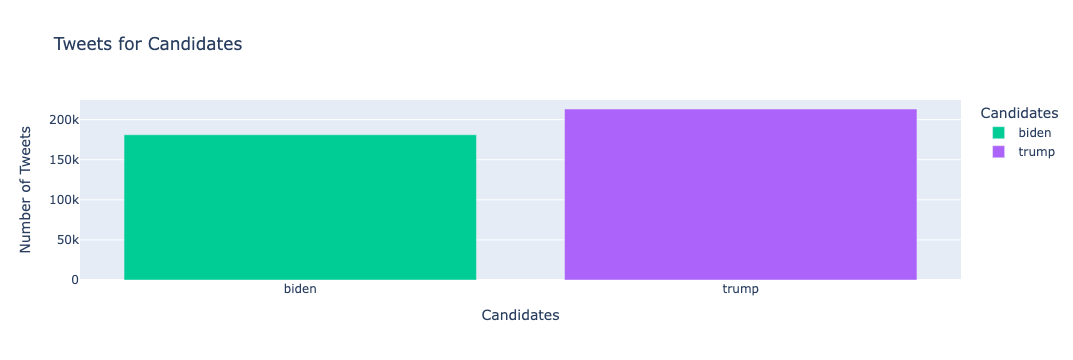

In [62]:
### Group the data by 'candidate' and count the number of tweets for each candidate 
tweets_count = data.groupby('candidate')['tweet'].count().reset_index() 

# Interactive bar chart 
fig_tweets = px.bar(tweets_count, x='candidate', y='tweet', color='candidate', 
color_discrete_map={'Trump': 'pink', 'Biden': 'blue'}, 
labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'}, 
title='Tweets for Candidates') 

# Show the chart 
pio.show(fig_tweets)

**COMMENT**:

This figure shows that the number of tweets with Trump's hashtags are much more that the ones with biden's one.

### Number of Tweets in every federal states

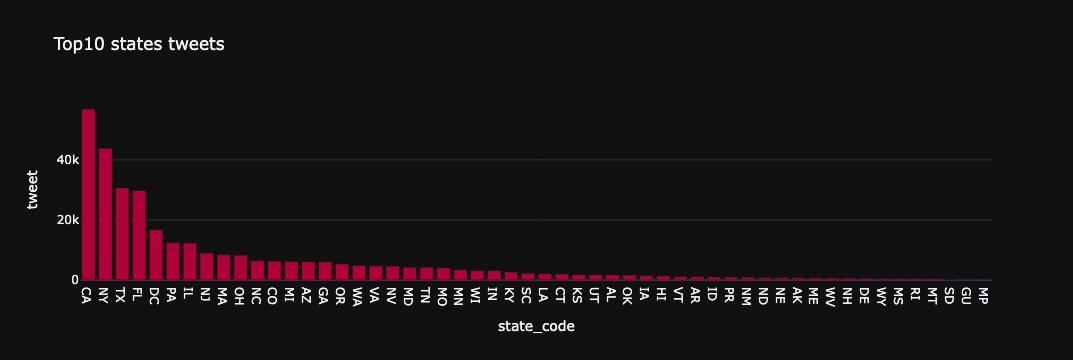

In [ ]:
# federal states tweets Counts 
fed_states = data.groupby('state_code')['tweet'].count().sort_values(ascending=False).reset_index() 
 
# Interactive bar chart 
fig_tweet_bystates = px.bar(fed_states, x='state_code', y='tweet', 
template='plotly_dark', 
color_discrete_sequence=px.colors.qualitative.Dark24_r, 
title='Top10 states tweets') 

# view the graph 
pio.show(fig_tweet_bystates)

**COMMENT**:

This figure shows the distribution of the number of tweets across each federal state. Note that, although the District of Columbia is not a federal state, it ranks 5th in terms of the number of tweets shared.

### Number of Tweets in every federal states for each candidate

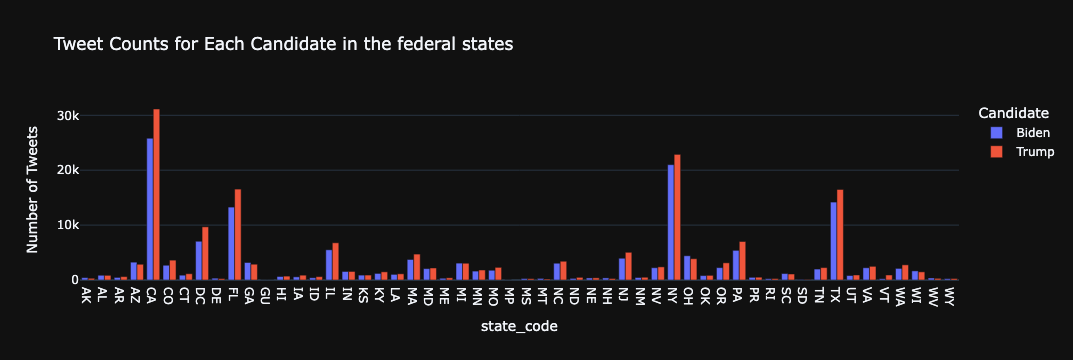

In [46]:
# the number of tweets done for each candidate by all the states. 
tweet_df = data.groupby(['state_code', 'candidate'])['tweet'].count().reset_index() 

# Candidate for top 20 state_code tweet 
tweeters = tweet_df[tweet_df['state_code'].isin(fed_states.state_code)] 

# Plot for tweet counts for each candidate in the top 20 state_code 
fig_state_tweet = px.bar(tweeters, x='state_code', y='tweet', color='candidate', 
                         labels={'state_code': 'state_code', 'tweet': 'Number of Tweets', 
                                 'candidate': 'Candidate'}, 
                                 title='Tweet Counts for Each Candidate in the federal states',
                                 template='plotly_dark', 
                                 barmode='group') 

# Show the chart 
pio.show(fig_state_tweet) 

**COMMENT**:

This figure shows the distribution of tweets across each federal state using either Biden or Trump's hashtags. In nearly every federal state, Trump appears to receive at least as many tweets as Biden.